<a href="https://colab.research.google.com/github/Rafiy27/Tugas-Akhir-Hate-Speech/blob/main/TA_Model_(FastText_self_trained_model)_80_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Library

In [ ]:
!pip install pandas openpyxl fasttext tensorflow scikit-learn
!pip install pydot graphviz
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=a16e14a3cae64e968d24d60c163af177d53c5365ae90d7ff1051fee1b1ce5a25
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [81]:
!pip install umap-learn matplotlib seaborn

# Setting Up and Import Data

In [ ]:
import pandas as pd

# Load dataset
try:
    df = pd.read_excel("modified_dataset.xlsx")
except FileNotFoundError:
    print("File dataset tidak ditemukan. Pastikan file sudah diunggah dengan benar.")
    exit()

# Data Preprocessing

In [ ]:
df.dropna(subset=['full_text'], inplace=True)

In [ ]:
data = df['full_text']
labels = df['Label_Final']

In [ ]:
print(len(data))

48913


## Data Cleaning

In [ ]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text.lower().strip()

df['cleaned'] = df['full_text'].apply(clean_text)
df['cleaned']

0                     android_ak_47 anies orang campus aja
1        pak anies juga blm masa kampanye tapi bawaslu ...
2        kosim__ yang ngusung anies sbg gub dki itu pks...
3        android_ak_47 saya malu klo tdk milih anies me...
4        msaid_didu entah siapa yg salah ttg kegagalan ...
                               ...                        
48915           lgbt lebih najis dan menakutkan drpd covid
48916    akugatausuwer lightmodee inluldream infotwitwo...
48917    ispeispeanjime oompaville najis gw sama ni ban...
48918    lisaamartatara4 anies malah promosiin lgbt lew...
48919    tadi gw komentar d who terkait lgbt dan liat k...
Name: cleaned, Length: 48913, dtype: object

## Case Folding

In [ ]:
# Convert text to lowercase
df['case_folded'] = df['cleaned'].str.lower()
df['case_folded']

0                     android_ak_47 anies orang campus aja
1        pak anies juga blm masa kampanye tapi bawaslu ...
2        kosim__ yang ngusung anies sbg gub dki itu pks...
3        android_ak_47 saya malu klo tdk milih anies me...
4        msaid_didu entah siapa yg salah ttg kegagalan ...
                               ...                        
48915           lgbt lebih najis dan menakutkan drpd covid
48916    akugatausuwer lightmodee inluldream infotwitwo...
48917    ispeispeanjime oompaville najis gw sama ni ban...
48918    lisaamartatara4 anies malah promosiin lgbt lew...
48919    tadi gw komentar d who terkait lgbt dan liat k...
Name: case_folded, Length: 48913, dtype: object

## Tokenizing

In [ ]:
## Tokenizing

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the text
df['tokenized'] = df['case_folded'].apply(lambda x: word_tokenize(x))
df['tokenized']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0               [android_ak_47, anies, orang, campus, aja]
1        [pak, anies, juga, blm, masa, kampanye, tapi, ...
2        [kosim__, yang, ngusung, anies, sbg, gub, dki,...
3        [android_ak_47, saya, malu, klo, tdk, milih, a...
4        [msaid_didu, entah, siapa, yg, salah, ttg, keg...
                               ...                        
48915    [lgbt, lebih, najis, dan, menakutkan, drpd, co...
48916    [akugatausuwer, lightmodee, inluldream, infotw...
48917    [ispeispeanjime, oompaville, najis, gw, sama, ...
48918    [lisaamartatara4, anies, malah, promosiin, lgb...
48919    [tadi, gw, komentar, d, who, terkait, lgbt, da...
Name: tokenized, Length: 48913, dtype: object

## Stopwords Filtering

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Remove stopwords
stop_words = set(stopwords.words('indonesian'))
df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['stopwords_removed']

0               [android_ak_47, anies, orang, campus, aja]
1        [anies, blm, kampanye, bawaslu, sdh, edar, sms...
2        [kosim__, ngusung, anies, sbg, gub, dki, pks, ...
3        [android_ak_47, malu, klo, tdk, milih, anies, ...
4        [msaid_didu, yg, salah, ttg, kegagalan, food, ...
                               ...                        
48915               [lgbt, najis, menakutkan, drpd, covid]
48916    [akugatausuwer, lightmodee, inluldream, infotw...
48917    [ispeispeanjime, oompaville, najis, gw, ni, ba...
48918    [lisaamartatara4, anies, promosiin, lgbt, mobi...
48919    [gw, komentar, d, who, terkait, lgbt, liat, ko...
Name: stopwords_removed, Length: 48913, dtype: object

## Stemming

In [ ]:
from nltk.stem import PorterStemmer

# Perform stemming
stemmer = PorterStemmer()
df['stemmed'] = df['stopwords_removed'].apply(lambda x: [stemmer.stem(word) for word in x])
df['stemmed_text'] = df['stemmed'].apply(lambda x: ' '.join(x))
df['stemmed_text']

0                        android_ak_47 ani orang campu aja
1        ani blm kampany bawaslu sdh edar sm berantai m...
2        kosim__ ngusung ani sbg gub dki pk gerindrapra...
3        android_ak_47 malu klo tdk milih ani kerusakan...
4        msaid_didu yg salah ttg kegagalan food estat y...
                               ...                        
48915                      lgbt naji menakutkan drpd covid
48916    akugatausuw lightmode inluldream infotwitwor_ ...
48917    ispeispeanjim oompavil naji gw ni banci lgbt n...
48918    lisaamartatara4 ani promosiin lgbt mobil formu...
48919    gw komentar d who terkait lgbt liat komentar n...
Name: stemmed_text, Length: 48913, dtype: object

In [ ]:
# Tokenize the stemmed text
df['tokenized_after_stemming'] = df['stemmed_text'].apply(lambda x: word_tokenize(x))
df['tokenized_after_stemming']

0                  [android_ak_47, ani, orang, campu, aja]
1        [ani, blm, kampany, bawaslu, sdh, edar, sm, be...
2        [kosim__, ngusung, ani, sbg, gub, dki, pk, ger...
3        [android_ak_47, malu, klo, tdk, milih, ani, ke...
4        [msaid_didu, yg, salah, ttg, kegagalan, food, ...
                               ...                        
48915                [lgbt, naji, menakutkan, drpd, covid]
48916    [akugatausuw, lightmode, inluldream, infotwitw...
48917    [ispeispeanjim, oompavil, naji, gw, ni, banci,...
48918    [lisaamartatara4, ani, promosiin, lgbt, mobil,...
48919    [gw, komentar, d, who, terkait, lgbt, liat, ko...
Name: tokenized_after_stemming, Length: 48913, dtype: object

In [ ]:
df

,id_str,conversation_id_str,full_text,Label_Putri,Label_Dea,Label_Rafi,Label_Final,Unnamed: 7,Unnamed: 8,cleaned,case_folded,tokenized,stopwords_removed,stemmed,stemmed_text,tokenized_after_stemming
0,1640500000000000000,1640480000000000000,@Android_AK_47 Anies orang campus aja,0.0,0.0,0.0,0,NaN,NaN,android_ak_47 anies orang campus aja,android_ak_47 anies orang campus aja,"[android_ak_47, anies, orang, campus, aja]","[android_ak_47, anies, orang, campus, aja]","[android_ak_47, ani, orang, campu, aja]",android_ak_47 ani orang campu aja,"[android_ak_47, ani, orang, campu, aja]"
1,1640500000000000000,1640500000000000000,Pak Anies juga blm masa kampanye tapi Bawaslu ...,0.0,0.0,0.0,0,NaN,24460.0,pak anies juga blm masa kampanye tapi bawaslu ...,pak anies juga blm masa kampanye tapi bawaslu ...,"[pak, anies, juga, blm, masa, kampanye, tapi, ...","[anies, blm, kampanye, bawaslu, sdh, edar, sms...","[ani, blm, kampany, bawaslu, sdh, edar, sm, be...",ani blm kampany bawaslu sdh edar sm berantai m...,"[ani, blm, kampany, bawaslu, sdh, edar, sm, be..."
2,1640500000000000000,1640270000000000000,@Kosim__ Yang ngusung Anies sbg Gub DKI itu PK...,0.0,0.0,0.0,0,NaN,24460.0,kosim__ yang ngusung anies sbg gub dki itu pks...,kosim__ yang ngusung anies sbg gub dki itu pks...,"[kosim__, yang, ngusung, anies, sbg, gub, dki,...","[kosim__, ngusung, anies, sbg, gub, dki, pks, ...","[kosim__, ngusung, ani, sbg, gub, dki, pk, ger...",kosim__ ngusung ani sbg gub dki pk gerindrapra...,"[kosim__, ngusung, ani, sbg, gub, dki, pk, ger..."
3,1640500000000000000,1640480000000000000,@Android_AK_47 Saya malu klo tdk milih Anies M...,0.0,0.0,0.0,0,NaN,NaN,android_ak_47 saya malu klo tdk milih anies me...,android_ak_47 saya malu klo tdk milih anies me...,"[android_ak_47, saya, malu, klo, tdk, milih, a...","[android_ak_47, malu, klo, tdk, milih, anies, ...","[android_ak_47, malu, klo, tdk, milih, ani, ke...",android_ak_47 malu klo tdk milih ani kerusakan...,"[android_ak_47, malu, klo, tdk, milih, ani, ke..."
4,1640500000000000000,1640460000000000000,@msaid_didu Entah siapa yg salah ...ttg kegaga...,0.0,0.0,1.0,0,NaN,NaN,msaid_didu entah siapa yg salah ttg kegagalan ...,msaid_didu entah siapa yg salah ttg kegagalan ...,"[msaid_didu, entah, siapa, yg, salah, ttg, keg...","[msaid_didu, yg, salah, ttg, kegagalan, food, ...","[msaid_didu, yg, salah, ttg, kegagalan, food, ...",msaid_didu yg salah ttg kegagalan food estat y...,"[msaid_didu, yg, salah, ttg, kegagalan, food, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48915,NaN,NaN,LGBT lebih najis dan menakutkan drpd Covid 🤭🤣😂...,NaN,NaN,NaN,1,NaN,NaN,lgbt lebih najis dan menakutkan drpd covid,lgbt lebih najis dan menakutkan drpd covid,"[lgbt, lebih, najis, dan, menakutkan, drpd, co...","[lgbt, najis, menakutkan, drpd, covid]","[lgbt, naji, menakutkan, drpd, covid]",lgbt naji menakutkan drpd covid,"[lgbt, naji, menakutkan, drpd, covid]"
48916,NaN,NaN,@Akugatausuwer @Lightmodee @inLuldreaM @infotw...,NaN,NaN,NaN,1,NaN,NaN,akugatausuwer lightmodee inluldream infotwitwo...,akugatausuwer lightmodee inluldream infotwitwo...,"[akugatausuwer, lightmodee, inluldream, infotw...","[akugatausuwer, lightmodee, inluldream, infotw...","[akugatausuw, lightmode, inluldream, infotwitw...",akugatausuw lightmode inluldream infotwitwor_ ...,"[akugatausuw, lightmode, inluldream, infotwitw..."
48917,NaN,NaN,@ispeispeanjime @oompaville Najis gw sama ni b...,NaN,NaN,NaN,1,NaN,NaN,ispeispeanjime oompaville najis gw sama ni ban...,ispeispeanjime oompaville najis gw sama ni ban...,"[ispeispeanjime, oompaville, najis, gw, sama, ...","[ispeispeanjime, oompaville, najis, gw, ni, ba...","[ispeispeanjim, oompavil, naji, gw, ni, banci,...",ispeispeanjim oompavil naji gw ni banci lgbt n...,"[ispeispeanjim, oompavil, naji, gw, ni, banci,..."
48918,NaN,NaN,@Lisaamartatara4 Anies malah promosiin LGBT le...,NaN,NaN,NaN,1,NaN,NaN,lisaamartatara4 anies malah promosiin lgbt lew...,lisaamartatara4 anies malah promosiin lgbt lew...,"[

In [ ]:
data = df['stemmed_text']
data

0                        android_ak_47 ani orang campu aja
1        ani blm kampany bawaslu sdh edar sm berantai m...
2        kosim__ ngusung ani sbg gub dki pk gerindrapra...
3        android_ak_47 malu klo tdk milih ani kerusakan...
4        msaid_didu yg salah ttg kegagalan food estat y...
                               ...                        
48915                      lgbt naji menakutkan drpd covid
48916    akugatausuw lightmode inluldream infotwitwor_ ...
48917    ispeispeanjim oompavil naji gw ni banci lgbt n...
48918    lisaamartatara4 ani promosiin lgbt mobil formu...
48919    gw komentar d who terkait lgbt liat komentar n...
Name: stemmed_text, Length: 48913, dtype: object

In [ ]:
labels

0        0
1        0
2        0
3        0
4        0
        ..
48915    1
48916    1
48917    1
48918    1
48919    1
Name: Label_Final, Length: 48913, dtype: int64

# TF IDF Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['stemmed_text'])

dense_tfidf = tfidf_matrix.todense()
feature_names = tfidf_vectorizer.get_feature_names_out()
keywords_df = pd.DataFrame(dense_tfidf, columns=feature_names)

print("Keywords List:")
print(keywords_df.head())

Keywords List:
   agama       aja       ani  anj  bangsat  kontol   lu  polisi   rt        yg
0    0.0  0.758211  0.652009  0.0      0.0     0.0  0.0     0.0  0.0  0.000000
1    0.0  0.000000  1.000000  0.0      0.0     0.0  0.0     0.0  0.0  0.000000
2    0.0  0.000000  1.000000  0.0      0.0     0.0  0.0     0.0  0.0  0.000000
3    0.0  0.000000  1.000000  0.0      0.0     0.0  0.0     0.0  0.0  0.000000
4    0.0  0.000000  0.750849  0.0      0.0     0.0  0.0     0.0  0.0  0.660473


In [ ]:
# Print a sample of the dense representation of the TF-IDF matrix
num_samples_to_print = 5  # You can adjust this number based on your preference

# Assuming `dense` is a NumPy array obtained from tfidf_matrix.todense()
print("Dense: ")
for i in range(min(num_samples_to_print, dense_tfidf.shape[0])):
    print(f"Sample {i + 1}: {dense_tfidf[i].tolist()}")

Dense: 
Sample 1: [[0.0, 0.7582109921746533, 0.6520092724383052, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Sample 2: [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Sample 3: [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Sample 4: [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Sample 5: [[0.0, 0.0, 0.7508494862793273, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6604733521907378]]


# FastText Feature Expansion

In [ ]:
import fasttext.util
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load FastText model
model_path = '/content/drive/MyDrive/FastText Model/trained_model_tweet_wikidump.bin'
ft = fasttext.load_model(model_path)

# Define a function to get semantically similar words and their similarity values
def get_similar_words_fasttext(word):
    similar_words = ft.get_nearest_neighbors(word, k=10)  # Adjust 'k' based on the desired number of similar words
    return similar_words

# Apply feature expansion to the data using FastText
def expand_features_with_fasttext(tweet):
    expanded_features = []

    for word in tweet.split():
        similar_words = get_similar_words_fasttext(word)

        # Assuming you want to use the weight of the most similar word
        if similar_words:
            most_similar_word = similar_words[0][1]  # Adjust index based on the structure of similar_words
            weight = similar_words[0][0]  # Adjust index based on the structure of similar_words
            expanded_features.append((most_similar_word, weight))

    return expanded_features

# Define a function to expand features using FastText and feature expansion
def expand_features_with_fasttext_and_vectors(text):
    # Get the word vectors for the input text
    word_vectors = ft.get_sentence_vector(text)

    # Apply feature expansion using FastText
    expanded_features = expand_features_with_fasttext(text)

    return word_vectors, expanded_features

# Apply feature expansion to the data
fasttext_word_vectors, expanded_features_data = zip(*[expand_features_with_fasttext_and_vectors(tweet) for tweet in data])

Mounted at /content/drive


In [ ]:
fasttext_word_vectors

(array([-6.81129172e-02, -2.59816777e-02,  5.55566251e-02, -5.05315661e-02,
        -4.40717638e-02, -8.01713020e-02,  3.62715131e-04,  1.17667941e-02,
        -1.38106262e-02, -6.84166029e-02, -1.48462569e-02, -1.21623389e-01,
         3.79953794e-02, -1.23723410e-01,  6.50137886e-02,  2.14011427e-02,
         5.68246320e-02, -9.20074508e-02, -3.85077000e-02, -6.06749542e-02,
        -4.83755432e-02, -6.25013486e-02, -4.54039983e-02,  8.36520791e-02,
         6.71735359e-03,  5.20515032e-02,  1.08040003e-02, -3.27422582e-02,
        -5.09645231e-02,  4.83379886e-02,  8.50663055e-03, -8.76542926e-03,
         7.60414749e-02, -3.86565737e-02,  3.17246318e-02, -7.20214471e-02,
         5.33549972e-02,  6.02002349e-03,  9.24616456e-02,  4.58107889e-02,
        -5.05663641e-02, -9.59475413e-02,  1.23160263e-03,  3.69589590e-02,
        -2.22304109e-02, -9.64346230e-02,  7.17588291e-02, -1.61444265e-02,
         1.91618723e-03,  1.19030811e-01, -9.23727732e-03, -4.29825857e-02,
        -7.5

In [ ]:
# Print a sample of the expanded features
num_samples_to_print = 5  # You can adjust this number based on your preference
print("Expanded Features: ")
for i in range(min(num_samples_to_print, len(expanded_features_data))):
    print(f"Sample {i + 1}: {expanded_features_data[i]}")

Expanded Features: 
Sample 1: [('rasyid', 0.5709190368652344), ('buzzerrp', 0.6608030796051025), ('petualangan', 0.7033770084381104), ('campur', 0.7735918760299683), ('lo', 0.8214234113693237)]
Sample 2: [('buzzerrp', 0.6608030796051025), ('klo', 0.6965577602386475), ('kampanye', 0.7267905473709106), ('sahabatbawaslu', 0.8523554801940918), ('thread', 0.6181629300117493), ('sedar', 0.6178870797157288), ('emg', 0.6979634165763855), ('beranta', 0.7887754440307617), ('melarat', 0.8846840262413025), ('diselenggarakan', 0.7890632152557373), ('aniespenipu', 0.9131045341491699), ('sholatnya', 0.8407600522041321), ('dg', 0.6526144742965698)]
Sample 3: [('florieliciouss', 0.8991299271583557), ('pengusung', 0.8584359288215637), ('buzzerrp', 0.6608030796051025), ('spt', 0.5134320855140686), ('gubernur', 0.6279323697090149), ('warga', 0.7243422865867615), ('demokrat', 0.7045274972915649), ('prabowo', 0.8938324451446533), ('pengusung', 0.8584359288215637), ('uno', 0.7894002199172974), ('spt', 0.5134

In [ ]:
# Print top 10 similar words for each input word in the dataset
while True:
    input_word = input("Enter a word (or 'exit' to stop): ")

    if input_word.lower() == 'exit':
        break

    print(f"Word: {input_word}")

    # Check if the input word exists in the dataset
    if input_word in " ".join(data):
        similar_words = get_similar_words_fasttext(input_word)

        # Print the top 10 similar words and their ranks
        for rank, similar_word in enumerate(similar_words, start=1):
            word_str, similarity = similar_word  # Extract elements from the tuple
            print(f"Rank-{rank}: {word_str} (Similarity: {similarity})")

    else:
        print("Input word not found in the dataset.")

    print("\n" + "-"*50 + "\n")

Enter a word (or 'exit' to stop): anies
Word: anies
Rank-1: 0.8934361338615417 (Similarity: aniesbusuk)
Rank-2: 0.870528519153595 (Similarity: aniesngibul)
Rank-3: 0.8502545952796936 (Similarity: aniesamin)
Rank-4: 0.8459662199020386 (Similarity: aniespenipu)
Rank-5: 0.8386803865432739 (Similarity: aniesimin)
Rank-6: 0.8331959843635559 (Similarity: aniesygmani)
Rank-7: 0.831006646156311 (Similarity: aniespembohong)
Rank-8: 0.8240863680839539 (Similarity: aniesgag)
Rank-9: 0.8229677081108093 (Similarity: aniesgabecu)
Rank-10: 0.8185310959815979 (Similarity: aniesgaamanah)

--------------------------------------------------

Enter a word (or 'exit' to stop): arema
Word: arema
Rank-1: 0.8363142013549805 (Similarity: aremania)
Rank-2: 0.6535599231719971 (Similarity: suport)
Rank-3: 0.6304908394813538 (Similarity: nyalahin)
Rank-4: 0.5896061658859253 (Similarity: acab)
Rank-5: 0.587206244468689 (Similarity: panpel)
Rank-6: 0.5374609231948853 (Similarity: rusuh)
Rank-7: 0.5266153812408447 (S

# Combine FastText and TF IDF

In [ ]:
# # Print the shapes before concatenation
# print("Shape of TF-IDF matrix:", dense_tfidf.shape)
# print("Shape of FastText word vectors:", fasttext_word_vectors.shape)

In [ ]:
# Check if the number of rows match
if len(dense_tfidf) != len(fasttext_word_vectors):
    raise ValueError("Number of rows in TF-IDF matrix and FastText word vectors must match!")

# Concatenate TF-IDF matrix with FastText word vectors
combined_features = np.concatenate((dense_tfidf, fasttext_word_vectors), axis=1)

# Get feature names for TF-IDF matrix
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Create feature names for FastText vectors
fasttext_feature_names = ['ft_vector_{}'.format(i) for i in range(len(fasttext_word_vectors[0]))]

# Combine feature names
all_feature_names = np.concatenate((tfidf_feature_names, fasttext_feature_names))

# Check if the number of feature names matches the number of columns in combined features
if len(all_feature_names) != combined_features.shape[1]:
    raise ValueError("Number of feature names and columns in combined features must match!")

# Convert the combined features to a DataFrame for better visualization
combined_features_df = pd.DataFrame(combined_features, columns=all_feature_names)

# Print a sample of the combined features
num_samples_to_print = 5  # You can adjust this number based on your preference
print("Combined Features: ")
print(combined_features_df.head(num_samples_to_print))

Combined Features: 
   agama       aja       ani  anj  bangsat  kontol   lu  polisi   rt  \
0    0.0  0.758211  0.652009  0.0      0.0     0.0  0.0     0.0  0.0   
1    0.0  0.000000  1.000000  0.0      0.0     0.0  0.0     0.0  0.0   
2    0.0  0.000000  1.000000  0.0      0.0     0.0  0.0     0.0  0.0   
3    0.0  0.000000  1.000000  0.0      0.0     0.0  0.0     0.0  0.0   
4    0.0  0.000000  0.750849  0.0      0.0     0.0  0.0     0.0  0.0   

         yg  ...  ft_vector_90  ft_vector_91  ft_vector_92  ft_vector_93  \
0  0.000000  ...      0.079523      0.032080      0.012270      0.018845   
1  0.000000  ...     -0.058382      0.001560      0.046760      0.023412   
2  0.000000  ...     -0.031173      0.048792      0.070593      0.065614   
3  0.000000  ...      0.072511     -0.019620      0.032193      0.033669   
4  0.660473  ...     -0.035019      0.005987      0.059996      0.036250   

   ft_vector_94  ft_vector_95  ft_vector_96  ft_vector_97  ft_vector_98  \
0      0.081199

# CNN

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

## CNN Model Training

In [ ]:
# CNN Model Training
labels_array = df['Label_Final'].values
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['stemmed_text'])
sequences = tokenizer.texts_to_sequences(df['stemmed_text'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
# Split the combined features into train and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_features, labels_array, test_size=0.2, random_state=42)

# Split the original data into train and test sets
X_train_no_expansion, X_test_no_expansion, y_train_no_expansion, y_test_no_expansion = train_test_split(dense_tfidf, labels_array, test_size=0.2, random_state=42)

In [ ]:
# Check data types and dimensions
print("Data types and dimensions of variables:")
print("X_train_combined type:", type(X_train_combined))
print("X_train_combined dtype:", X_train_combined.dtype)
print("X_train_combined shape:", X_train_combined.shape)
print("y_train_combined type:", type(y_train_combined))
print("y_train_combined dtype:", y_train_combined.dtype)
print("y_train_combined shape:", y_train_combined.shape)

print("\nX_test_combined type:", type(X_test_combined))
print("X_test_combined dtype:", X_test_combined.dtype)
print("X_test_combined shape:", X_test_combined.shape)
print("y_test_combined type:", type(y_test_combined))
print("y_test_combined dtype:", y_test_combined.dtype)
print("y_test_combined shape:", y_test_combined.shape)

print("\nX_train_no_expansion type:", type(X_train_no_expansion))
print("X_train_no_expansion dtype:", X_train_no_expansion.dtype)
print("X_train_no_expansion shape:", X_train_no_expansion.shape)
print("y_train_no_expansion type:", type(y_train_no_expansion))
print("y_train_no_expansion dtype:", y_train_no_expansion.dtype)
print("y_train_no_expansion shape:", y_train_no_expansion.shape)

print("\nX_test_no_expansion type:", type(X_test_no_expansion))
print("X_test_no_expansion dtype:", X_test_no_expansion.dtype)
print("X_test_no_expansion shape:", X_test_no_expansion.shape)
print("y_test_no_expansion type:", type(y_test_no_expansion))
print("y_test_no_expansion dtype:", y_test_no_expansion.dtype)
print("y_test_no_expansion shape:", y_test_no_expansion.shape)

Data types and dimensions of variables:
X_train_combined type: <class 'numpy.matrix'>
X_train_combined dtype: float64
X_train_combined shape: (39130, 110)
y_train_combined type: <class 'numpy.ndarray'>
y_train_combined dtype: int64
y_train_combined shape: (39130,)

X_test_combined type: <class 'numpy.matrix'>
X_test_combined dtype: float64
X_test_combined shape: (9783, 110)
y_test_combined type: <class 'numpy.ndarray'>
y_test_combined dtype: int64
y_test_combined shape: (9783,)

X_train_no_expansion type: <class 'numpy.matrix'>
X_train_no_expansion dtype: float64
X_train_no_expansion shape: (39130, 10)
y_train_no_expansion type: <class 'numpy.ndarray'>
y_train_no_expansion dtype: int64
y_train_no_expansion shape: (39130,)

X_test_no_expansion type: <class 'numpy.matrix'>
X_test_no_expansion dtype: float64
X_test_no_expansion shape: (9783, 10)
y_test_no_expansion type: <class 'numpy.ndarray'>
y_test_no_expansion dtype: int64
y_test_no_expansion shape: (9783,)


# CNN Model with Feature Expansion
## Find the Best Parameter

In [ ]:
import time
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [31]:
# Record the start time
start_time = time.time()

# Data Preprocessing
X_train_combined_reshaped = X_train_combined.reshape(X_train_combined.shape[0], X_train_combined.shape[1], 1)
X_test_combined_reshaped = X_test_combined.reshape(X_test_combined.shape[0], X_test_combined.shape[1], 1)

def create_cnn_model_expansion(learning_rate=0.001):
    optimizer = Adam(learning_rate=learning_rate)
    model_expansion = Sequential([
       Conv1D(128, 5, activation='relu', input_shape=(combined_features.shape[1], 1)),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model_expansion.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model_expansion

# Wrap the Keras model in a scikit-learn compatible classifier
cnn_model_expansion = KerasClassifier(build_fn=create_cnn_model_expansion, verbose=0)

# Parameter grid for CNN Model with Feature Expansion
param_grid_expansion = {
    'learning_rate': [0.001, 0.01, 0.1],  # Add different learning rates to tune
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    # Add other hyperparameters you want to tune
}

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Perform Grid Search for CNN Model with Feature Expansion
grid_search_expansion = GridSearchCV(
    estimator=cnn_model_expansion,
    param_grid=param_grid_expansion,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

grid_result_expansion = grid_search_expansion.fit(
    X_train_combined_reshaped,
    y_train_combined,
    validation_split=0.2,
    callbacks=[early_stopping]  # Add early stopping callback
)

# Record the end time
end_time = time.time()

# Calculate the total runtime
total_runtime = end_time - start_time

# Display the total runtime
print(f"Total runtime: {total_runtime:.2f} seconds")

# Display the best parameters for CNN Model with Feature Expansion
print("Best Parameters (with Feature Expansion):", grid_result_expansion.best_params_)

# Extract the best hyperparameters for CNN Model with Feature Expansion
best_params_expansion = grid_result_expansion.best_params_

# Use the best hyperparameters to build and train a final model for CNN Model with Feature Expansion
final_cnn_model_expansion = create_cnn_model_expansion(learning_rate=best_params_expansion['learning_rate'])
final_cnn_history_expansion = final_cnn_model_expansion.fit(
    X_train_combined_reshaped,
    y_train_combined,
    epochs=best_params_expansion['epochs'],
    batch_size=best_params_expansion['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping],  # Add early stopping callback
    verbose=1
)

# Evaluate the final model for CNN Model with Feature Expansion
final_test_loss_expansion, final_test_accuracy_expansion = final_cnn_model_expansion.evaluate(
    X_test_combined_reshaped,
    y_test_combined,
    verbose=0
)

print(f"Final CNN Model (with Feature Expansion) - Test Loss: {final_test_loss_expansion:.4f}, Test Accuracy: {final_test_accuracy_expansion:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


<ipython-input-31-733365387b25>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model_expansion = KerasClassifier(build_fn=create_cnn_model_expansion, verbose=0)


Total runtime: 3559.11 seconds
Best Parameters (with Feature Expansion): {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001}
Best Parameters (with Feature Expansion): {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001}
Epoch 1/20
490/490 [==============================] - 6s 10ms/step - loss: 0.6139 - accuracy: 0.6695 - val_loss: 0.5707 - val_accuracy: 0.7236
Epoch 2/20
490/490 [==============================] - 7s 14ms/step - loss: 0.5633 - accuracy: 0.7193 - val_loss: 0.5481 - val_accuracy: 0.7439
Epoch 3/20
490/490 [==============================] - 5s 10ms/step - loss: 0.5433 - accuracy: 0.7368 - val_loss: 0.5304 - val_accuracy: 0.7460
Epoch 4/20
490/490 [==============================] - 5s 10ms/step - loss: 0.5293 - accuracy: 0.7479 - val_loss: 0.5160 - val_accuracy: 0.7590
Epoch 5/20
490/490 [==============================] - 7s 13ms/step - loss: 0.5211 - accuracy: 0.7489 - val_loss: 0.5135 - val_accuracy: 0.7600
Epoch 6/20
490/490 [==============================] - 5s

## CNN that Does Not Use Feature Expansion

In [32]:
# Record the start time
start_time_no_expansion = time.time()

# Data Preprocessing
X_train_no_expansion_reshaped = X_train_no_expansion.reshape(X_train_no_expansion.shape[0], X_train_no_expansion.shape[1], 1)
X_test_no_expansion_reshaped = X_test_no_expansion.reshape(X_test_no_expansion.shape[0], X_test_no_expansion.shape[1], 1)

# Define CNN model without feature expansion
def create_cnn_model_no_expansion(learning_rate=0.001):
    optimizer = Adam(learning_rate=learning_rate)
    model_no_expansion = Sequential([
        Conv1D(128, 5, activation='relu', input_shape=(dense_tfidf.shape[1], 1)),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model_no_expansion.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model_no_expansion

# Wrap the Keras model in a scikit-learn compatible classifier
cnn_model_no_expansion = KerasClassifier(build_fn=create_cnn_model_no_expansion, verbose=0)

# Parameter grid for CNN Model without Feature Expansion
param_grid_no_expansion = {
    'learning_rate': [0.001, 0.01, 0.1],  # Add different learning rates to tune
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    # Add other hyperparameters you want to tune
}

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Perform Grid Search for CNN Model without Feature Expansion
grid_search_no_expansion = GridSearchCV(
    estimator=cnn_model_no_expansion,
    param_grid=param_grid_no_expansion,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

grid_result_no_expansion = grid_search_no_expansion.fit(
    X_train_no_expansion_reshaped,
    y_train_no_expansion,
    validation_split=0.2,
    callbacks=[early_stopping]  # Add early stopping callback
)

# Record the end time
end_time_no_expansion = time.time()

# Calculate the total runtime
total_runtime_no_expansion = end_time_no_expansion - start_time_no_expansion

# Display the total runtime
print(f"Total runtime (without Feature Expansion): {total_runtime_no_expansion:.2f} seconds")

# Display the best parameters for CNN Model without Feature Expansion
print("Best Parameters (without Feature Expansion):", grid_result_no_expansion.best_params_)

# Extract the best hyperparameters for CNN Model without Feature Expansion
best_params_no_expansion = grid_result_no_expansion.best_params_

# Use the best hyperparameters to build and train a final model for CNN Model without Feature Expansion
final_cnn_model_no_expansion = create_cnn_model_no_expansion(learning_rate=best_params_no_expansion['learning_rate'])
final_cnn_history_no_expansion = final_cnn_model_no_expansion.fit(
    X_train_no_expansion_reshaped,
    y_train_no_expansion,
    epochs=best_params_no_expansion['epochs'],
    batch_size=best_params_no_expansion['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping],  # Add early stopping callback
    verbose=1
)

# Evaluate the final model for CNN Model without Feature Expansion
final_test_loss_no_expansion, final_test_accuracy_no_expansion = final_cnn_model_no_expansion.evaluate(
    X_test_no_expansion_reshaped,
    y_test_no_expansion,
    verbose=0
)

print(f"Final CNN Model (without Feature Expansion) - Test Loss: {final_test_loss_no_expansion:.4f}, Test Accuracy: {final_test_accuracy_no_expansion:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


<ipython-input-32-c98597dfe6c9>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model_no_expansion = KerasClassifier(build_fn=create_cnn_model_no_expansion, verbose=0)


Total runtime (without Feature Expansion): 966.23 seconds
Best Parameters (without Feature Expansion): {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001}
Epoch 1/10
979/979 [==============================] - 4s 3ms/step - loss: 0.5536 - accuracy: 0.7360 - val_loss: 0.5122 - val_accuracy: 0.7625
Epoch 2/10
979/979 [==============================] - 3s 3ms/step - loss: 0.5199 - accuracy: 0.7645 - val_loss: 0.5077 - val_accuracy: 0.7708
Epoch 3/10
979/979 [==============================] - 4s 4ms/step - loss: 0.5159 - accuracy: 0.7646 - val_loss: 0.5072 - val_accuracy: 0.7659
Epoch 4/10
979/979 [==============================] - 4s 4ms/step - loss: 0.5147 - accuracy: 0.7657 - val_loss: 0.5060 - val_accuracy: 0.7695
Epoch 5/10
979/979 [==============================] - 3s 3ms/step - loss: 0.5146 - accuracy: 0.7660 - val_loss: 0.5089 - val_accuracy: 0.7703
Epoch 6/10
979/979 [==============================] - 3s 3ms/step - loss: 0.5146 - accuracy: 0.7670 - val_loss: 0.5029 - val_accur

# Model Evaluation

In [68]:
import umap
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

## Test Loss and Test Accuracy

In [34]:
# Evaluate CNN Model with Feature Expansion
final_test_loss_expansion, final_test_accuracy_expansion = final_cnn_model_expansion.evaluate(
    X_test_combined_reshaped,
    y_test_combined,
    verbose=0
)

# Evaluate CNN Model without Feature Expansion
final_test_loss_no_expansion, final_test_accuracy_no_expansion = final_cnn_model_no_expansion.evaluate(
    X_test_no_expansion_reshaped,
    y_test_no_expansion,
    verbose=0
)

print(f"Final CNN Model (with Feature Expansion) - Test Loss: {final_test_loss_expansion:.4f}, Test Accuracy: {final_test_accuracy_expansion:.4f}")
print(f"Final CNN Model (without Feature Expansion) - Test Loss: {final_test_loss_no_expansion:.4f}, Test Accuracy: {final_test_accuracy_no_expansion:.4f}")

Final CNN Model (with Feature Expansion) - Test Loss: 0.4839, Test Accuracy: 0.7791
Final CNN Model (without Feature Expansion) - Test Loss: 0.5046, Test Accuracy: 0.7706


In [35]:
# Compare the performance of the two models
if final_test_accuracy_expansion > final_test_accuracy_no_expansion:
    print("CNN Model with Feature Expansion performs better.")
elif final_test_accuracy_expansion < final_test_accuracy_no_expansion:
    print("CNN Model without Feature Expansion performs better.")
else:
    print("Both CNN models have similar performance.")

CNN Model with Feature Expansion performs better.


In [76]:
# Extract loss and accuracy from model history
loss_expansion = final_cnn_history_expansion.history['loss']
val_loss_expansion = final_cnn_history_expansion.history['val_loss']
accuracy_expansion = final_cnn_history_expansion.history['accuracy']
val_accuracy_expansion = final_cnn_history_expansion.history['val_accuracy']

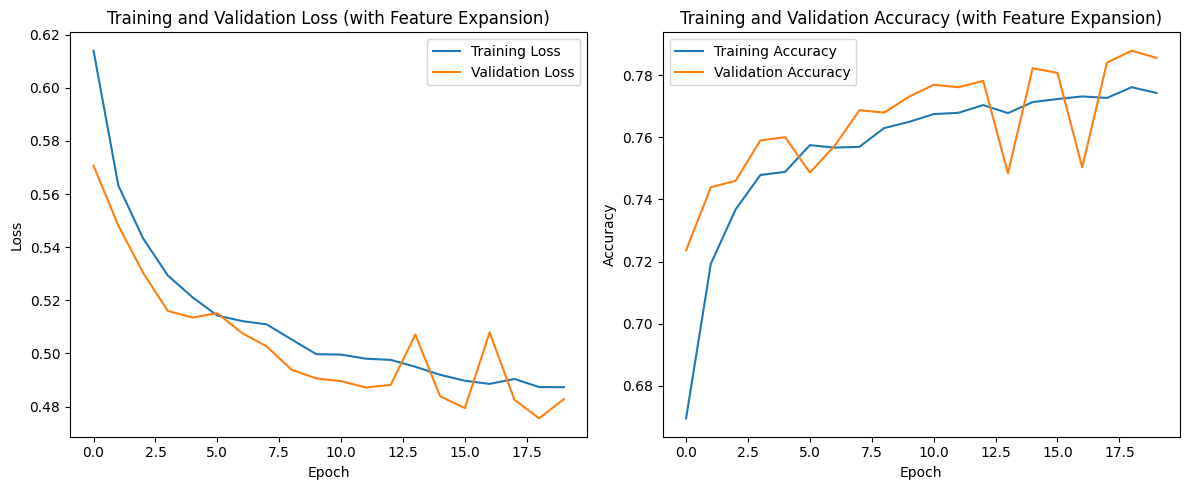

In [77]:
# Plot training and validation loss curves for CNN Model with Feature Expansion
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_expansion, label='Training Loss')
plt.plot(val_loss_expansion, label='Validation Loss')
plt.title('Training and Validation Loss (with Feature Expansion)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_expansion, label='Training Accuracy')
plt.plot(val_accuracy_expansion, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (with Feature Expansion)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Classification Report

In [36]:
# Evaluate CNN Model with Feature Expansion
final_test_loss_expansion, final_test_accuracy_expansion = final_cnn_model_expansion.evaluate(
    X_test_combined_reshaped,
    y_test_combined,
    verbose=0
)

# Predict probabilities
y_pred_prob_expansion = final_cnn_model_expansion.predict(X_test_combined_reshaped)

# Thresholding to obtain predicted classes
threshold = 0.5  # Adjust the threshold based on your preference
y_pred_expansion = (y_pred_prob_expansion > threshold).astype(int)

# Print classification report
classification_report_expansion = classification_report(y_test_combined, y_pred_expansion)
print(f"Classification Report (with Feature Expansion):\n{classification_report_expansion}")

306/306 [==============================] - 1s 4ms/step
Classification Report (with Feature Expansion):
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      4962
           1       0.76      0.81      0.78      4821

    accuracy                           0.78      9783
   macro avg       0.78      0.78      0.78      9783
weighted avg       0.78      0.78      0.78      9783



In [37]:
# Evaluate CNN Model without Feature Expansion
final_test_loss_no_expansion, final_test_accuracy_no_expansion = final_cnn_model_no_expansion.evaluate(
    X_test_no_expansion_reshaped,
    y_test_no_expansion,
    verbose=0
)

# Predict probabilities
y_pred_prob_no_expansion = final_cnn_model_no_expansion.predict(X_test_no_expansion_reshaped)

# Thresholding to obtain predicted classes
threshold = 0.5  # Adjust the threshold based on your preference
y_pred_no_expansion = (y_pred_prob_no_expansion > threshold).astype(int)

# Print classification report
classification_report_no_expansion = classification_report(y_test_no_expansion, y_pred_no_expansion)
print(f"Classification Report (without Feature Expansion):\n{classification_report_no_expansion}")

306/306 [==============================] - 1s 2ms/step
Classification Report (without Feature Expansion):
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      4962
           1       0.81      0.70      0.75      4821

    accuracy                           0.77      9783
   macro avg       0.78      0.77      0.77      9783
weighted avg       0.78      0.77      0.77      9783



## Confusion Matrix

In [38]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

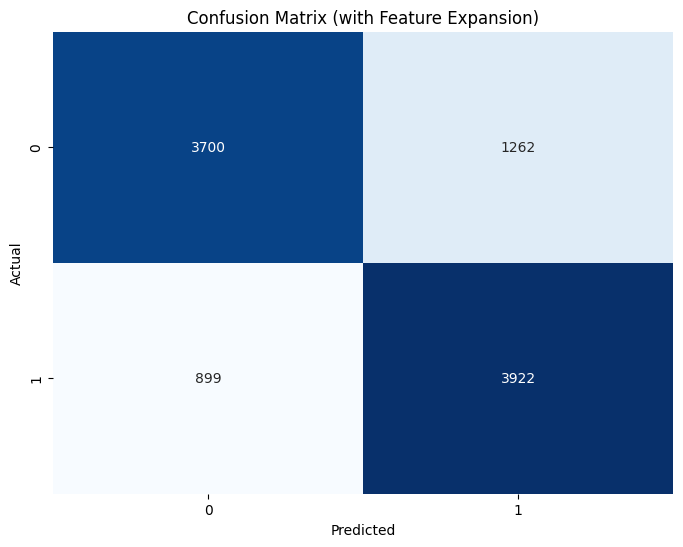

In [39]:
# Plot Confusion Matrix for CNN Model with Feature Expansion
plot_confusion_matrix(y_test_combined, y_pred_expansion, 'Confusion Matrix (with Feature Expansion)')

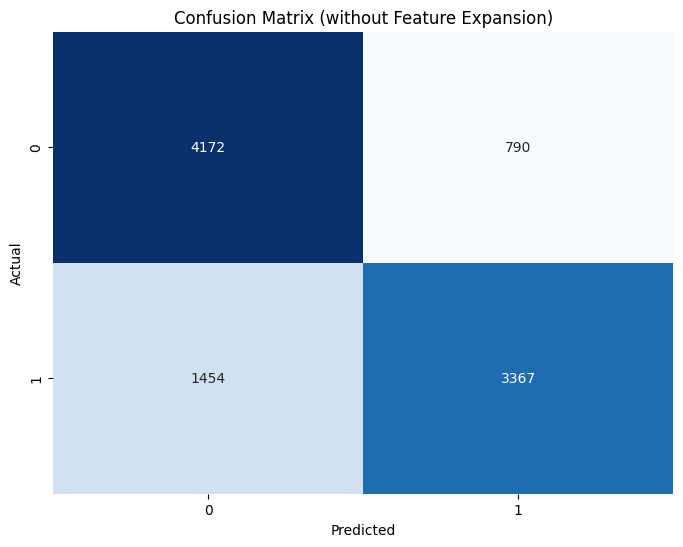

In [40]:
# Plot Confusion Matrix for CNN Model without Feature Expansion
plot_confusion_matrix(y_test_no_expansion, y_pred_no_expansion, 'Confusion Matrix (without Feature Expansion)')

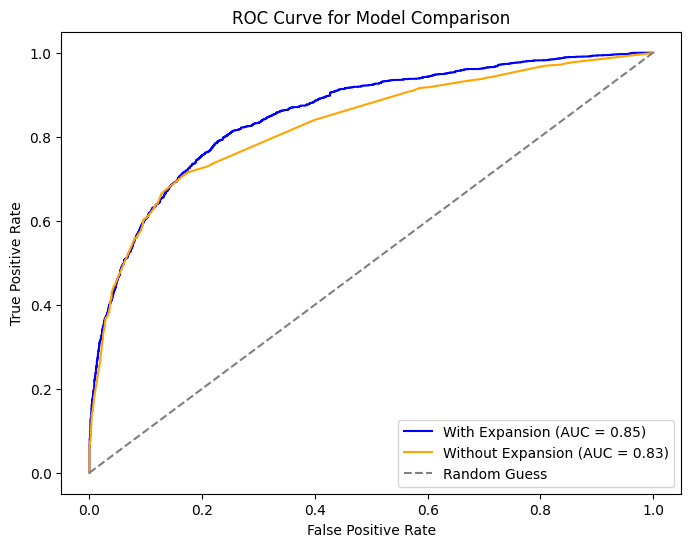

In [62]:
# Calculate ROC curve and AUC for CNN Model with Feature Expansion
fpr_expansion, tpr_expansion, _ = roc_curve(y_test_combined, y_pred_prob_expansion)
roc_auc_expansion = roc_auc_score(y_test_combined, y_pred_prob_expansion)

# Calculate ROC curve and AUC for CNN Model without Feature Expansion
fpr_no_expansion, tpr_no_expansion, _ = roc_curve(y_test_no_expansion, y_pred_prob_no_expansion)
roc_auc_no_expansion = roc_auc_score(y_test_no_expansion, y_pred_prob_no_expansion)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_expansion, tpr_expansion, label=f'With Expansion (AUC = {roc_auc_expansion:.2f})', color='blue')
plt.plot(fpr_no_expansion, tpr_no_expansion, label=f'Without Expansion (AUC = {roc_auc_no_expansion:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve for Model Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Check Prediction

In [41]:
def check_predictions_cnn_with_expansion(model, X_test, y_test, data):
    # Generate predictions for the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Create a DataFrame with true labels, predicted labels, and text data
    results_df = pd.DataFrame({
        'True_Labels_With_Expansion': y_test,
        'Predicted_Labels_With_Expansion': y_pred.flatten(),  # Flatten the predictions
        'Text_Data': [data.iloc[idx] for idx in range(len(X_test))]  # Retrieve the original text data
    })

    return results_df

# Call the function for CNN Model with Feature Expansion
results_df_with_expansion = check_predictions_cnn_with_expansion(final_cnn_model_expansion, X_test_combined_reshaped, y_test_combined, df['stemmed_text'])
print("Results DataFrame for CNN Model with Feature Expansion:")
results_df_with_expansion

306/306 [==============================] - 1s 4ms/step
Results DataFrame for CNN Model with Feature Expansion:


,True_Labels_With_Expansion,Predicted_Labels_With_Expansion,Text_Data
0,0,0,android_ak_47 ani orang campu aja
1,0,0,ani blm kampany bawaslu sdh edar sm berantai m...
2,1,1,kosim__ ngusung ani sbg gub dki pk gerindrapra...
3,1,1,android_ak_47 malu klo tdk milih ani kerusakan...
4,0,0,msaid_didu yg salah ttg kegagalan food estat y...
...,...,...,...
9778,0,0,polrihebat tebaspinjolpolri apresiasipolri
9779,0,0,polrihebat tebaspinjolpolri apresiasipolri
9780,1,1,polrihebat tebaspinjolpolri apresiasipolri
9781,1,0,semangat porli polrihebat tebaspinjolpolri apr...


In [42]:
def check_predictions_cnn_without_expansion(model, X_test, y_test, data):
    # Generate predictions for the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Create a DataFrame with true labels, predicted labels, and text data
    results_df = pd.DataFrame({
        'True_Labels_No_Expansion': y_test,
        'Predicted_Labels_No_Expansion': y_pred.flatten(),  # Flatten the predictions
        'Text_Data': [data.iloc[idx] for idx in range(len(X_test))]  # Retrieve the original text data
    })

    return results_df

# Call the function for CNN Model without Feature Expansion
results_df_no_expansion = check_predictions_cnn_without_expansion(final_cnn_model_no_expansion, X_test_no_expansion_reshaped, y_test_no_expansion, df['stemmed_text'])
print("Results DataFrame for CNN Model without Feature Expansion:")
results_df_no_expansion

306/306 [==============================] - 1s 2ms/step
Results DataFrame for CNN Model without Feature Expansion:


,True_Labels_No_Expansion,Predicted_Labels_No_Expansion,Text_Data
0,0,0,android_ak_47 ani orang campu aja
1,0,0,ani blm kampany bawaslu sdh edar sm berantai m...
2,1,1,kosim__ ngusung ani sbg gub dki pk gerindrapra...
3,1,1,android_ak_47 malu klo tdk milih ani kerusakan...
4,0,0,msaid_didu yg salah ttg kegagalan food estat y...
...,...,...,...
9778,0,0,polrihebat tebaspinjolpolri apresiasipolri
9779,0,0,polrihebat tebaspinjolpolri apresiasipolri
9780,1,1,polrihebat tebaspinjolpolri apresiasipolri
9781,1,0,semangat porli polrihebat tebaspinjolpolri apr...


In [43]:
# Combine both dataframes
combined_results_df = pd.concat([results_df_with_expansion, results_df_no_expansion], axis=1)

combined_results_df

,True_Labels_With_Expansion,Predicted_Labels_With_Expansion,Text_Data,True_Labels_No_Expansion,Predicted_Labels_No_Expansion,Text_Data
0,0,0,android_ak_47 ani orang campu aja,0,0,android_ak_47 ani orang campu aja
1,0,0,ani blm kampany bawaslu sdh edar sm berantai m...,0,0,ani blm kampany bawaslu sdh edar sm berantai m...
2,1,1,kosim__ ngusung ani sbg gub dki pk gerindrapra...,1,1,kosim__ ngusung ani sbg gub dki pk gerindrapra...
3,1,1,android_ak_47 malu klo tdk milih ani kerusakan...,1,1,android_ak_47 malu klo tdk milih ani kerusakan...
4,0,0,msaid_didu yg salah ttg kegagalan food estat y...,0,0,msaid_didu yg salah ttg kegagalan food estat y...
...,...,...,...,...,...,...
9778,0,0,polrihebat tebaspinjolpolri apresiasipolri,0,0,polrihebat tebaspinjolpolri apresiasipolri
9779,0,0,polrihebat tebaspinjolpolri apresiasipolri,0,0,polrihebat tebaspinjolpolri apresiasipolri
9780,1,1,polrihebat tebaspinjolpolri apresiasipolri,1,1,polrihebat tebaspinjolpolri apresiasipolri
9781,1,0,semangat porli polrihebat tebaspinjolpolri apr...,1,0,semangat porli polrihebat tebaspinjolpolri apr...


In [44]:
# Include 'Text_Data' column from the original data
combined_results_df['Text_Data'] = df['stemmed_text']

# Display texts with correct predictions
correct_predictions = combined_results_df[
    (combined_results_df['True_Labels_With_Expansion'] == combined_results_df['Predicted_Labels_With_Expansion']) &
    (combined_results_df['True_Labels_No_Expansion'] == combined_results_df['Predicted_Labels_No_Expansion'])
]

print("Texts with Correct Predictions:")
correct_predictions

Texts with Correct Predictions:


,True_Labels_With_Expansion,Predicted_Labels_With_Expansion,Text_Data,True_Labels_No_Expansion,Predicted_Labels_No_Expansion,Text_Data
0,0,0,android_ak_47 ani orang campu aja,0,0,android_ak_47 ani orang campu aja
1,0,0,ani blm kampany bawaslu sdh edar sm berantai m...,0,0,ani blm kampany bawaslu sdh edar sm berantai m...
2,1,1,kosim__ ngusung ani sbg gub dki pk gerindrapra...,1,1,kosim__ ngusung ani sbg gub dki pk gerindrapra...
3,1,1,android_ak_47 malu klo tdk milih ani kerusakan...,1,1,android_ak_47 malu klo tdk milih ani kerusakan...
4,0,0,msaid_didu yg salah ttg kegagalan food estat y...,0,0,msaid_didu yg salah ttg kegagalan food estat y...
...,...,...,...,...,...,...
9776,0,0,polrihebat tebaspinjolpolri apresiasipolri,0,0,polrihebat tebaspinjolpolri apresiasipolri
9777,1,1,semangat porli polrihebat tebaspinjolpolri apr...,1,1,semangat porli polrihebat tebaspinjolpolri apr...
9778,0,0,semangat porli polrihebat tebaspinjolpolri apr...,0,0,semangat porli polrihebat tebaspinjolpolri apr...
9779,0,0,polrihebat tebaspinjolpolri apresiasipolri,0,0,polrihebat tebaspinjolpolri apresiasipolri


In [45]:
# Display texts with incorrect predictions
incorrect_predictions = combined_results_df[
    ~((combined_results_df['True_Labels_With_Expansion'] == combined_results_df['Predicted_Labels_With_Expansion']) &
      (combined_results_df['True_Labels_No_Expansion'] == combined_results_df['Predicted_Labels_No_Expansion']))
]

print("Texts with Incorrect Predictions:")
incorrect_predictions

Texts with Incorrect Predictions:


,True_Labels_With_Expansion,Predicted_Labels_With_Expansion,Text_Data,True_Labels_No_Expansion,Predicted_Labels_No_Expansion,Text_Data
5,0,1,android_ak_47 ani,0,1,android_ak_47 ani
7,0,1,dennysiregar7 setuju bang demokrasi kayak pend...,0,1,dennysiregar7 setuju bang demokrasi kayak pend...
8,1,1,untung ani pelakunya,1,0,untung ani pelakunya
13,1,0,soundofyogi ii am convinc cat girl ha convinc ...,1,0,soundofyogi ii am convinc cat girl ha convinc ...
20,1,0,ani baswedan laaah,1,0,ani baswedan laaah
...,...,...,...,...,...,...
9769,0,1,polrihebat tebaspinjolpolri apresiasipolri,0,0,polrihebat tebaspinjolpolri apresiasipolri
9770,0,1,polrihebat tebaspinjolpolri apresiasipolri,0,1,polrihebat tebaspinjolpolri apresiasipolri
9772,1,1,polrihebat tebaspinjolpolri apresiasipolri,1,0,polrihebat tebaspinjolpolri apresiasipolri
9781,1,0,polrihebat tebaspinjolpolri apresiasipolri,1,0,polrihebat tebaspinjolpolri apresiasipolri


In [66]:
# Extract misclassified samples for CNN Model with Feature Expansion
misclassified_expansion = combined_results_df[
    combined_results_df['True_Labels_With_Expansion'] != combined_results_df['Predicted_Labels_With_Expansion']
]

# Extract misclassified samples for CNN Model without Feature Expansion
misclassified_no_expansion = combined_results_df[
    combined_results_df['True_Labels_No_Expansion'] != combined_results_df['Predicted_Labels_No_Expansion']
]

In [64]:
# Print misclassified samples
print("Misclassified Samples for Model with Feature Expansion:")
misclassified_expansion[['True_Labels_With_Expansion', 'Predicted_Labels_With_Expansion', 'Text_Data']]

Misclassified Samples for Model with Feature Expansion:


,True_Labels_With_Expansion,Predicted_Labels_With_Expansion,Text_Data,Text_Data
5,0,1,android_ak_47 ani,android_ak_47 ani
7,0,1,dennysiregar7 setuju bang demokrasi kayak pend...,dennysiregar7 setuju bang demokrasi kayak pend...
13,1,0,soundofyogi ii am convinc cat girl ha convinc ...,soundofyogi ii am convinc cat girl ha convinc ...
20,1,0,ani baswedan laaah,ani baswedan laaah
25,1,0,dedy_pram dennysiregar7 iya sih gp ani ani gak...,dedy_pram dennysiregar7 iya sih gp ani ani gak...
...,...,...,...,...
9764,1,0,polrihebat tebaspinjolpolri apresiasipolri,polrihebat tebaspinjolpolri apresiasipolri
9769,0,1,polrihebat tebaspinjolpolri apresiasipolri,polrihebat tebaspinjolpolri apresiasipolri
9770,0,1,polrihebat tebaspinjolpolri apresiasipolri,polrihebat tebaspinjolpolri apresiasipolri
9781,1,0,polrihebat tebaspinjolpolri apresiasipolri,polrihebat tebaspinjolpolri apresiasipolri


In [65]:
print("\nMisclassified Samples for Model without Feature Expansion:")
misclassified_no_expansion[['True_Labels_No_Expansion', 'Predicted_Labels_No_Expansion', 'Text_Data']]


Misclassified Samples for Model without Feature Expansion:


,True_Labels_No_Expansion,Predicted_Labels_No_Expansion,Text_Data,Text_Data
5,0,1,android_ak_47 ani,android_ak_47 ani
7,0,1,dennysiregar7 setuju bang demokrasi kayak pend...,dennysiregar7 setuju bang demokrasi kayak pend...
8,1,0,untung ani pelakunya,untung ani pelakunya
13,1,0,soundofyogi ii am convinc cat girl ha convinc ...,soundofyogi ii am convinc cat girl ha convinc ...
20,1,0,ani baswedan laaah,ani baswedan laaah
...,...,...,...,...
9764,1,0,polrihebat tebaspinjolpolri apresiasipolri,polrihebat tebaspinjolpolri apresiasipolri
9770,0,1,polrihebat tebaspinjolpolri apresiasipolri,polrihebat tebaspinjolpolri apresiasipolri
9772,1,0,polrihebat tebaspinjolpolri apresiasipolri,polrihebat tebaspinjolpolri apresiasipolri
9781,1,0,polrihebat tebaspinjolpolri apresiasipolri,polrihebat tebaspinjolpolri apresiasipolri


In [53]:
# Calculate the majority type of the true label for correct predictions
correct_predictions_majority = correct_predictions['True_Labels_With_Expansion'].mode().iloc[0]
print(f"Majority True Label for Correct Predictions: {correct_predictions_majority}")

# Print the counts of true labels for correct predictions
correct_predictions_counts = correct_predictions['True_Labels_With_Expansion'].value_counts()
print("Counts of True Labels for Correct Predictions:")
print(correct_predictions_counts)

Majority True Label for Correct Predictions: 0
Counts of True Labels for Correct Predictions:
0    3585
1    3229
Name: True_Labels_With_Expansion, dtype: int64


Text(0, 0.5, 'Count')

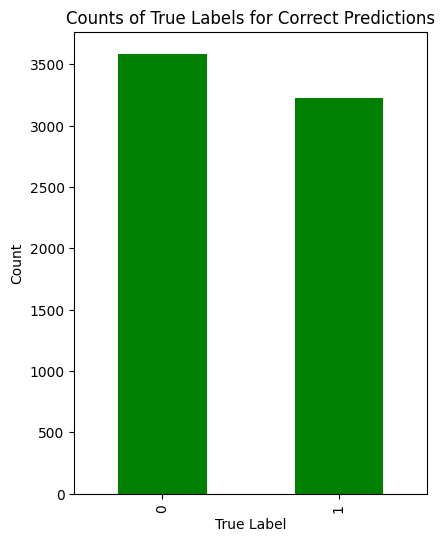

In [54]:
# Plot bar chart for correct predictions
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
correct_predictions_counts.plot(kind='bar', color='green')
plt.title('Counts of True Labels for Correct Predictions')
plt.xlabel('True Label')
plt.ylabel('Count')

In [51]:
# Calculate the majority type of the true label for incorrect predictions
incorrect_predictions_majority = incorrect_predictions['True_Labels_With_Expansion'].mode().iloc[0]
print(f"Majority True Label for Incorrect Predictions: {incorrect_predictions_majority}")

# Print the counts of true labels for incorrect predictions
incorrect_predictions_counts = incorrect_predictions['True_Labels_With_Expansion'].value_counts()
print("\nCounts of True Labels for Incorrect Predictions:")
print(incorrect_predictions_counts)

Majority True Label for Incorrect Predictions: 1

Counts of True Labels for Incorrect Predictions:
1    1592
0    1377
Name: True_Labels_With_Expansion, dtype: int64


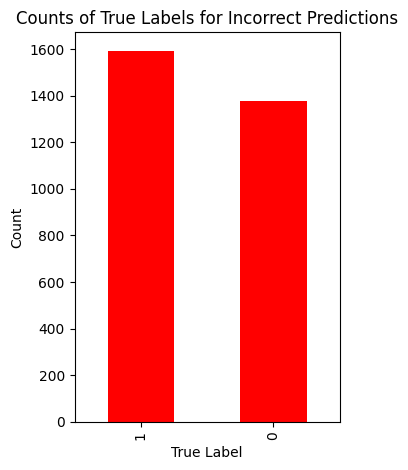

In [55]:
# Plot bar chart for incorrect predictions
plt.subplot(1, 2, 2)
incorrect_predictions_counts.plot(kind='bar', color='red')
plt.title('Counts of True Labels for Incorrect Predictions')
plt.xlabel('True Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()